# BTCUSD Trend Prediction Using RNN (LSTM) via TensorFlow 2

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv('archive/btc_1d_data_2018_to_2024-09-06.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2441 non-null   object 
 1   Open                          2441 non-null   float64
 2   High                          2441 non-null   float64
 3   Low                           2441 non-null   float64
 4   Close                         2441 non-null   float64
 5   Volume                        2441 non-null   float64
 6   Close time                    2441 non-null   object 
 7   Quote asset volume            2441 non-null   float64
 8   Number of trades              2441 non-null   int64  
 9   Taker buy base asset volume   2441 non-null   float64
 10  Taker buy quote asset volume  2441 non-null   float64
 11  Ignore                        2441 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 229.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2.441000e+03,2.441000e+03,2441.000000,2.441000e+03,2441.0
mean,25638.038853,26260.692028,24956.096841,25654.639590,73408.989955,1.772412e+09,1.553325e+06,36497.579067,8.779873e+08,0.0
std,19297.930055,19749.548732,18797.122543,19305.127701,82138.435643,2.018030e+09,1.938675e+06,40870.927556,1.002992e+09,0.0
min,3211.710000,3276.500000,3156.260000,3211.720000,1521.537318,1.177017e+07,1.241700e+04,844.258813,6.532639e+06,0.0
25%,8778.580000,8999.950000,8523.550000,8778.570000,31022.118530,3.669664e+08,3.991270e+05,15579.303258,1.834895e+08,0.0
50%,20295.110000,20868.480000,19854.920000,20337.820000,46289.384910,1.053601e+09,9.446900e+05,23046.711740,5.124108e+08,0.0
75%,39942.370000,40959.880000,38690.000000,39961.090000,76649.126960,2.482639e+09,1.743013e+06,37825.501493,1.237800e+09,0.0
max,73072.400000,73777.000000,71333.310000,73072.410000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


In [5]:
df.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2436,2024-09-02,57301.77,59425.69,57128.00,59132.13,22895.01461,2024-09-02 23:59:59.999,1.333092e+09,1966119,11295.25452,6.574966e+08,0
2437,2024-09-03,59132.12,59809.65,57415.00,57487.73,22828.18447,2024-09-03 23:59:59.999,1.335077e+09,2208758,10979.79204,6.422527e+08,0
2438,2024-09-04,57487.74,58519.00,55606.00,57970.90,35560.82146,2024-09-04 23:59:59.999,2.027631e+09,3177549,16861.75483,9.619232e+08,0
2439,2024-09-05,57970.90,58327.07,55643.65,56180.00,27806.91413,2024-09-05 23:59:59.999,1.577771e+09,3368058,12955.88970,7.349969e+08,0
2440,2024-09-06,56180.00,57008.00,53808.00,54172.45,34638.25642,2024-09-06 23:59:59.999,1.927613e+09,3352926,15981.16377,8.896687e+08,0


## Series Dataframe

In [6]:
dates = df['Open time']

In [7]:
date_index = pd.DatetimeIndex(dates)

In [8]:
series_df = pd.DataFrame(df['Close'].to_numpy(), index=date_index, columns=['BTCUSD']).rename_axis("Date")

In [9]:
series_df.head()

,BTCUSD
Date,
2018-01-01,13380.00
2018-01-02,14675.11
2018-01-03,14919.51
2018-01-04,15059.54
2018-01-05,16960.39


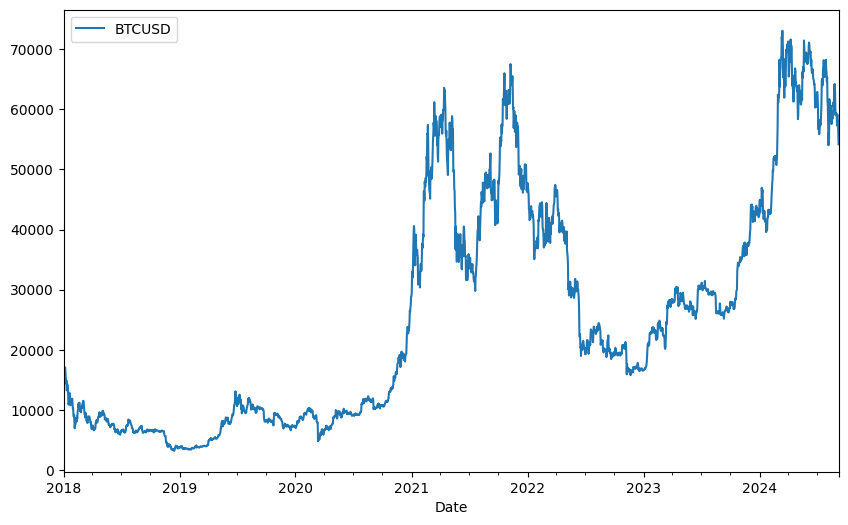

In [10]:
series_df.plot(figsize=(10, 6))

plt.show()

## Data/Train Params

In [11]:
LAST_PIECE_FOR_TEST = 90
TIMESERIES_LENGTH = 30

EPOCHS = 20
PATIENCE = 2

## Train/Test Split

In [12]:
len(series_df)

2441

In [13]:
ind = len(df) - LAST_PIECE_FOR_TEST

In [14]:
train = series_df[:ind]

In [15]:
test = series_df[ind:]

## Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [17]:
scaled_train = scaler.fit_transform(train)

In [18]:
scaled_test = scaler.transform(test)

## Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=TIMESERIES_LENGTH, batch_size=1)

In [21]:
X, y = generator[0]

In [22]:
y

array([[0.10124979]])

## Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [24]:
n_features = 1

In [25]:
class CustomModel:
    def __init__(self):
        self.model = Sequential()

        self.model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(TIMESERIES_LENGTH, n_features)))
        self.model.add(Dropout(0.2))
        self.model.add(LSTM(64, activation='relu', return_sequences=True))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(16, activation='relu'))
        
        
        self.model.add(Dense(1))
        
        self.model.compile(optimizer="adam", loss="mse")

In [26]:
model = CustomModel().model

/Users/timurmakhsumov/Desktop/data_science/TF_2_Notebooks_and_Data/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30, 16)         │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,593 (463.25 KB)

 Trainable params: 118,593 (463.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=TIMESERIES_LENGTH, batch_size=1)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping("val_loss", patience=PATIENCE)

In [31]:
model.fit(generator, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stop])

Epoch 1/20
  19/2321 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.2337

/Users/timurmakhsumov/Desktop/data_science/TF_2_Notebooks_and_Data/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2321/2321 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.0218 - val_loss: 0.0179
Epoch 2/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 3/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 4/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 5/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 6/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 7/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 9/20
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0045 - val_loss: 0.0049


In [32]:
history = model.history.history

<Axes: >

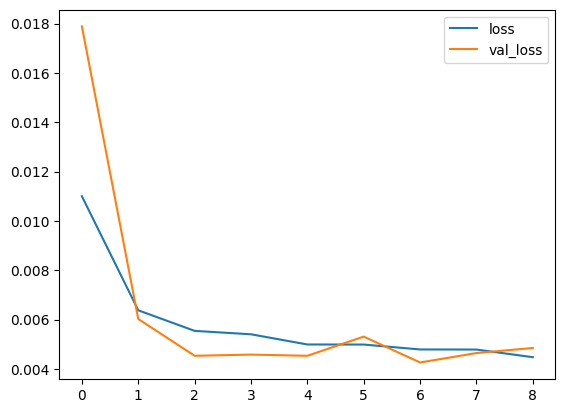

In [33]:
pd.DataFrame(history).plot()

## Make Test Predicitons

In [34]:
def make_predictions(steps):
    predictions = []

    first_eval_batch = scaled_train[-TIMESERIES_LENGTH:]
    current_batch = first_eval_batch.reshape((1, TIMESERIES_LENGTH, n_features))
    
    for i in range(steps):
        
        # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
        current_pred = model.predict(current_batch)[0][0]
        
        # store prediction
        predictions.append(current_pred) 
        
        # update batch to now include prediction and drop first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    return predictions

In [35]:
test_predictions = make_predictions(len(test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━

In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test["Predictions"] = true_predictions

/var/folders/jg/_146l5vj16z93k8wbds4ynm40000gn/T/ipykernel_10246/3424149773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_predictions


In [38]:
test

,BTCUSD,Predictions
Date,,
2024-06-09,69648.14,56821.865948
2024-06-10,69540.00,56838.813516
2024-06-11,67314.24,57255.182365
2024-06-12,68263.99,58151.837794
2024-06-13,66773.01,57312.537598
...,...,...
2024-09-02,59132.13,55234.191132
2024-09-03,57487.73,55395.230504
2024-09-04,57970.90,55307.819362


<Axes: xlabel='Date'>

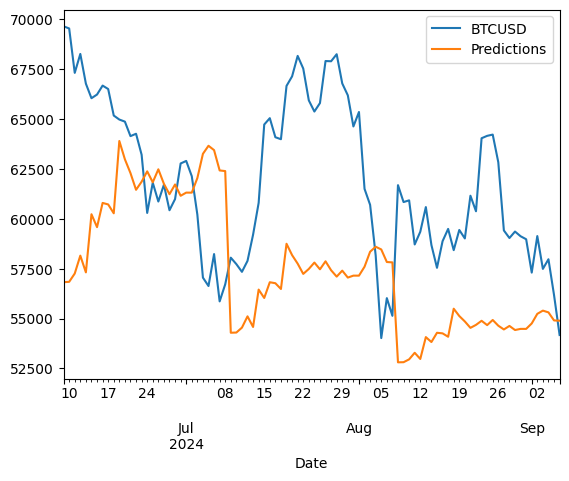

In [39]:
test.plot()

## Creating Final Model

In [63]:
scaled_total = scaler.transform(series_df)

In [64]:
total = TimeseriesGenerator(scaled_total, scaled_total, length=TIMESERIES_LENGTH, batch_size=1)

In [65]:
model = CustomModel().model

/Users/timurmakhsumov/Desktop/data_science/TF_2_Notebooks_and_Data/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.fit(total, epochs=6)

Epoch 1/6
  19/2411 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0711

/Users/timurmakhsumov/Desktop/data_science/TF_2_Notebooks_and_Data/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2411/2411 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - loss: 0.0183
Epoch 2/6
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 0.0062
Epoch 3/6
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 0.0054
Epoch 4/6
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 0.0050
Epoch 5/6
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.0050
Epoch 6/6
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.0053


## Forecast

In [67]:
forecast = make_predictions(100) # 100 days forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━

In [68]:
forecast = scaler.inverse_transform(forecast)

<Axes: >

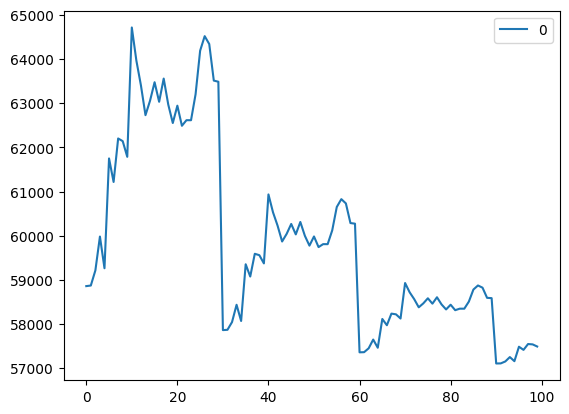

In [69]:
pd.DataFrame(forecast).plot()

In [70]:
forecast

array([[58859.50493922],
       [58872.9880412 ],
       [59215.31225786],
       [59981.43393802],
       [59264.14790331],
       [61750.01050891],
       [61217.84854699],
       [62202.08167915],
       [62141.6867097 ],
       [61787.19522189],
       [64715.05206543],
       [63965.41991085],
       [63405.20909936],
       [62729.79646598],
       [63056.22244813],
       [63475.62270481],
       [63032.34594821],
       [63558.60332748],
       [62970.76006858],
       [62552.19261622],
       [62944.72660547],
       [62489.39084228],
       [62616.18530034],
       [62615.5024008 ],
       [63203.04585014],
       [64189.26938462],
       [64518.56854168],
       [64339.89037435],
       [63512.60754476],
       [63486.94051555],
       [57863.75412329],
       [57870.60810286],
       [58044.84742316],
       [58437.01497851],
       [58069.73994435],
       [59354.38225163],
       [59076.56705777],
       [59591.58157869],
       [59559.82674988],
       [59373.84488864],


In [71]:
periods = 100
date_index = pd.date_range(start='2024-09-07',periods=periods,freq='D')

forecast_df = pd.DataFrame(forecast, index=date_index, columns=["Forecast"])

In [72]:
forecast_df.head(10)

,Forecast
2024-09-07,58859.504939
2024-09-08,58872.988041
2024-09-09,59215.312258
2024-09-10,59981.433938
2024-09-11,59264.147903
2024-09-12,61750.010509
2024-09-13,61217.848547
2024-09-14,62202.081679
2024-09-15,62141.686710
2024-09-16,61787.195222


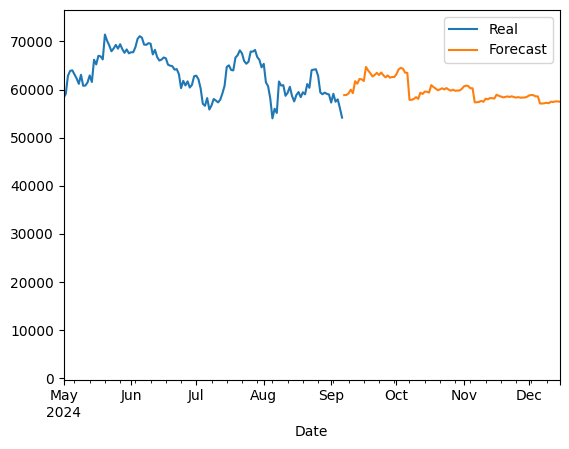

In [73]:
ax = series_df.plot()
forecast_df.plot(ax=ax)

plt.xlim(['2024-05-01', '2024-12-15'])

plt.legend(['Real', 'Forecast'])
plt.show()